In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import sys, os, warnings

sys.path.append(os.path.abspath("/groups/sylvia/UTLS-profiles/utilities/"))
from plotting_utilities import *
farbe = sim_colors()

# Figure S1: Temperature tracking and variability along synthetic trajectories

In [2]:
basedir = '/groups/sylvia/UTLS-profiles/output/'
syn_traj = xr.open_dataset(basedir + 'ICON_synthetic_trajs_1M0O_E2.nc')
T = syn_traj.temp.values
t = syn_traj.time.values # DataArray of length 12770

# Read in-situ data
daten = xr.open_dataset('/groups/sylvia/UTLS-profiles/obs/stratoclim2017.geophysika.0808_1.filtered_per_sec.nc')
T_Stratoclim = daten['BEST:TEMP']
t_Stratoclim = daten['time']

/home/u18/sylvia/.conda/envs/ncplot/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/home/u18/sylvia/.conda/envs/ncplot/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/u18/sylvia/.conda/envs/ncplot/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator


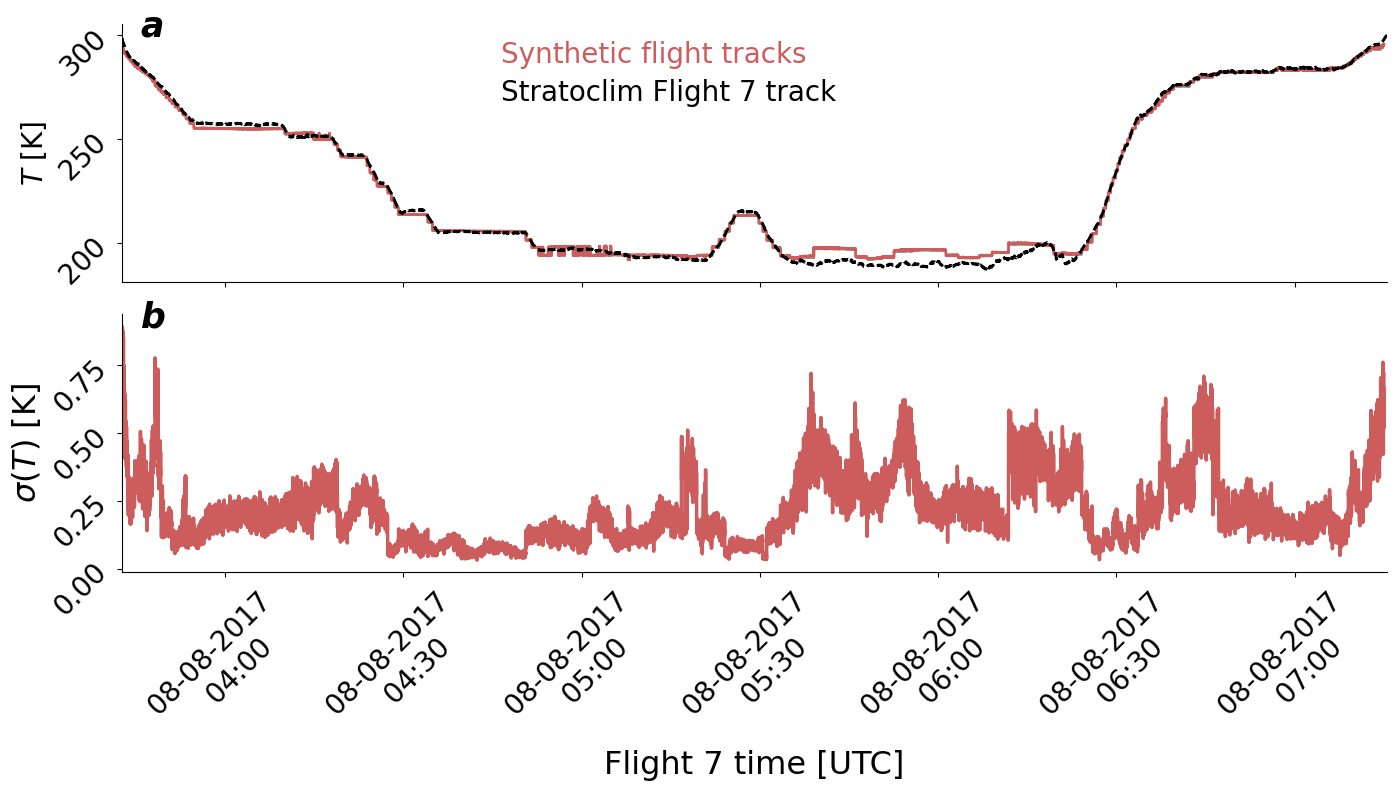

In [3]:
fs = 20
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14,8))
Tm = np.nanmean( T, axis=1 )
Tstd = np.nanstd( T, axis=1 )
ax[0].plot(t, Tm, color='indianred', linewidth=2)
ax[0].plot(t_Stratoclim, T_Stratoclim, color='k', linewidth=2, linestyle='--')
ax[0].fill_between(t, Tm - Tstd, Tm + Tstd, color='gray', alpha=0.8)
ax[0].set_xlim([t.min(), t.max()])
ax[0].set_ylabel(r'$T$ [K]', fontsize=fs)
sexy_axes(ax[0], fs=fs)
ax[0].set_xticklabels([])
ax[0].text(0.3, 0.7, 'Stratoclim Flight 7 track', fontsize=fs, transform=ax[0].transAxes)
ax[0].text(0.3, 0.85, 'Synthetic flight tracks',  fontsize=fs, color='indianred', transform=ax[0].transAxes)
ax[0].text(0.015, 0.95, 'a', weight='bold', style='italic', fontsize=fs+5, transform=ax[0].transAxes)

ax[1].plot(t, Tstd, color='indianred', linewidth=2.5)
ax[1].set_xlim([t.min(), t.max()])
ax[1].set_xlabel('Flight 7 time [UTC]', fontsize=fs+3)
ax[1].set_ylabel(r'$\sigma(T)$ [K]', fontsize=fs+3)
sexy_axes(ax[1], fs)
ax[1].set_xticklabels(['08-08-2017 \n 04:00', '08-08-2017 \n 04:30','08-08-2017 \n 05:00','08-08-2017 \n 05:30',
    '08-08-2017 \n 06:00','08-08-2017 \n 06:30','08-08-2017 \n 07:00'])
ax[1].text(0.015, 0.95, 'b', weight='bold', style='italic', fontsize=fs+5, transform=ax[1].transAxes)
plt.tight_layout()

#fig.savefig('output/syn-flight-track-Tcheck-full.pdf',bbox_inches='tight')
plt.show()

# Figure S2: Pressure tracking and variability along the trajectories

In [8]:
basedir = '/groups/sylvia/UTLS-profiles/output/'
syn_traj = xr.open_dataset(basedir + 'ICON_synthetic_trajs_1M0O_E2.nc')
P = syn_traj.pressure.values/100
t = syn_traj.time.values # DataArray of length 12770
print( P.shape )

# Read in-situ data
daten = xr.open_dataset('/groups/sylvia/UTLS-profiles/obs/stratoclim2017.geophysika.0808_1.filtered_per_sec.nc')
P_Stratoclim = daten['BEST:PRESS']
t_Stratoclim = daten['time']
print( P_Stratoclim.shape )

(12770, 20)
(12770,)


/home/u18/sylvia/.conda/envs/ncplot/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/home/u18/sylvia/.conda/envs/ncplot/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


[859.085 859.085 859.085 ...     nan     nan     nan]


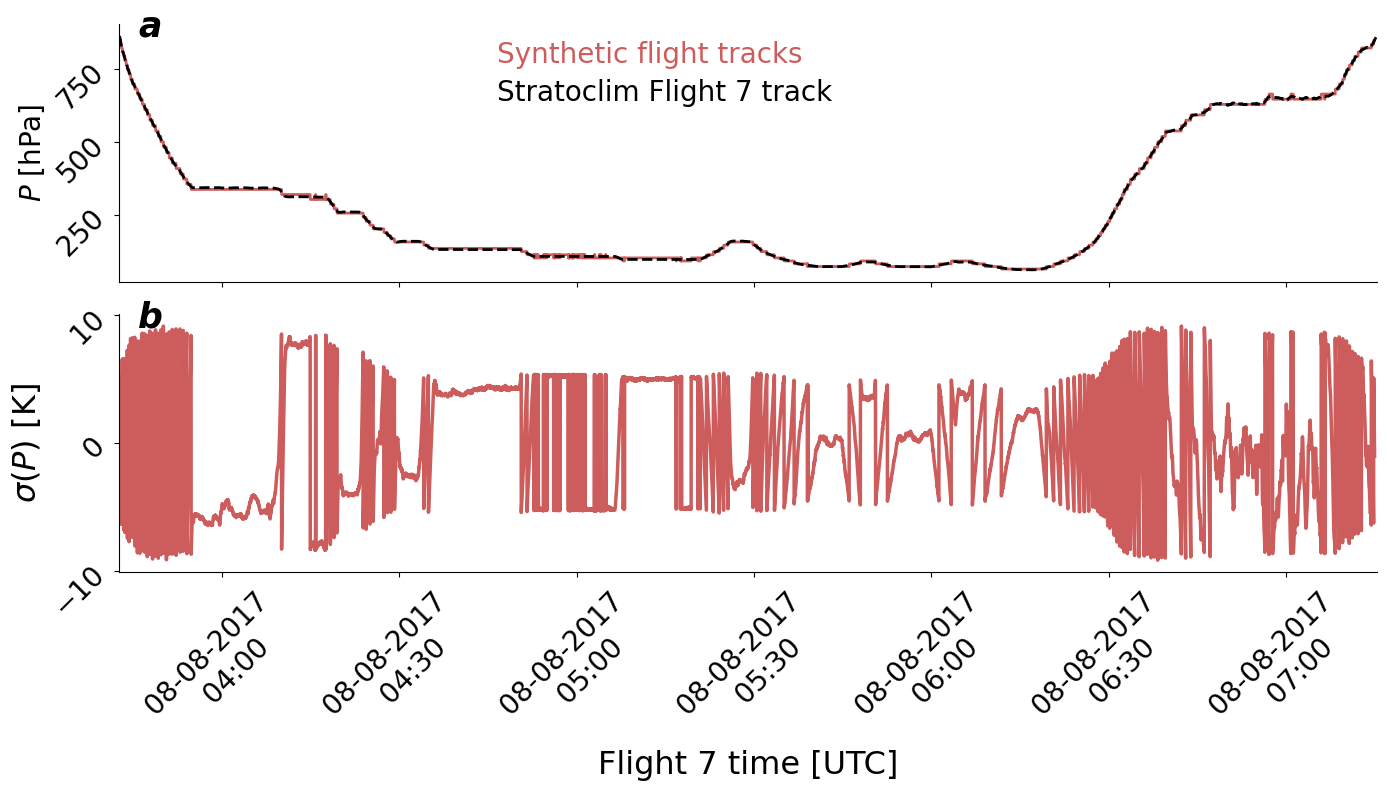

In [11]:
fs = 20
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14,8))
Pm = np.nanmean( P, axis=1 )
print( Pm)
ax[0].plot(t, Pm, color='indianred', linewidth=2)
ax[0].plot(t_Stratoclim, P_Stratoclim, color='k', linewidth=2, linestyle='--')
ax[0].set_xlim([t.min(), t.max()])
ax[0].set_ylabel(r'$P$ [hPa]', fontsize=fs)
sexy_axes(ax[0], fs=fs)
ax[0].set_xticklabels([])
ax[0].text(0.3, 0.7, 'Stratoclim Flight 7 track', fontsize=fs, transform=ax[0].transAxes)
ax[0].text(0.3, 0.85, 'Synthetic flight tracks',  fontsize=fs, color='indianred', transform=ax[0].transAxes)
ax[0].text(0.015, 0.95, 'a', weight='bold', style='italic', fontsize=fs+5, transform=ax[0].transAxes)

ax[1].plot(t, Pm-P_Stratoclim, color='indianred', linewidth=2.5)
ax[1].set_xlim([t.min(), t.max()])
ax[1].set_xlabel('Flight 7 time [UTC]', fontsize=fs+3)
ax[1].set_ylabel(r'$\sigma(P)$ [K]', fontsize=fs+3)
sexy_axes(ax[1], fs)
ax[1].set_xticklabels(['08-08-2017 \n 04:00', '08-08-2017 \n 04:30','08-08-2017 \n 05:00','08-08-2017 \n 05:30',
    '08-08-2017 \n 06:00','08-08-2017 \n 06:30','08-08-2017 \n 07:00'])
ax[1].text(0.015, 0.95, 'b', weight='bold', style='italic', fontsize=fs+5, transform=ax[1].transAxes)
plt.tight_layout()

#fig.savefig('output/syn-flight-track-Tcheck-full.pdf',bbox_inches='tight')
plt.show()

# Figure S2: Differences in T and qv profiles between different sets of synthetic trajectories

/sw/rhel6-x64/conda/anaconda3-bleeding_edge/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/sw/rhel6-x64/conda/anaconda3-bleeding_edge/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice
/sw/rhel6-x64/conda/anaconda3-bleeding_edge/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: Mean of empty slice
/sw/rhel6-x64/conda/anaconda3-bleeding_edge/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice
/sw/rhel6-x64/conda/anaconda3-bleeding_edge/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice
/sw/rhel6-x64/conda/anaconda3-bleeding_edge/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice
/sw/rhel6-x64/conda/anaconda3-bleeding_edge/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/sw/rhel6-x64/conda/anaconda3-bleeding_edge/lib/python3.6/site

0
1


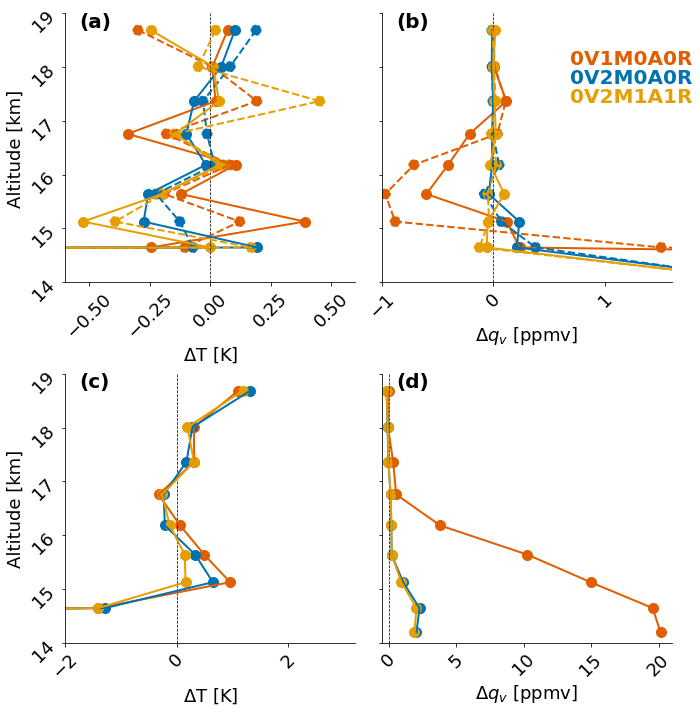

In [4]:
sim_list = ['0V1M0A0R', '0V2M0A0R', '0V2M1A1R']
min_alt = 14000
max_alt = 22000
fs = 18
icon_sz = 100
warnings.filterwarnings(action='once')
vgrid = xr.open_dataset('/work/bb1018/b380873/vgrid_icon-grid_tropic_55e115e5s40n.nc')
alt = vgrid.vct_a.values[:,0]
j = np.argwhere( (alt >= min_alt) & (alt <= max_alt) )
bins_sims = alt[j[:,0]]/1000.

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for a in ax.flatten():
    a.plot([0, 0],[min_alt/1000, 19], color='black', ls='--', lw=0.75)
    a.set_ylim([min_alt/1000, 19])
    sexy_axes(a, fs=fs)

for s_indx, s_name in enumerate( sim_list ):
    stats1 = np.load('output/ICON_syntrajs_' + s_name + '_stats.npy')
    stats2 = np.load('output/ICON_syntrajs_' + s_name + '_stats_2.npy')
    stats3 = np.load('output/ICON_syntrajs_' + s_name + '_stats_3.npy')
    stats4 = np.load('output/ICON_syntrajs_' + s_name + '_stats_collocate.npy')
    
    ax[0,0].scatter(np.nanmean((stats1[0,0]), axis=1) - np.nanmean((stats2[0,0]), axis=1), bins_sims, color=farbe[s_name], s=icon_sz)
    ax[0,0].plot(np.nanmean((stats1[0,0]), axis=1) - np.nanmean((stats2[0,0]), axis=1), bins_sims, color=farbe[s_name], lw=2)
    ax[0,1].scatter(np.nanmean((stats1[3,0]), axis=1) - np.nanmean((stats2[3,0]), axis=1), bins_sims, color=farbe[s_name], s=icon_sz)
    ax[0,1].plot(np.nanmean((stats1[3,0]), axis=1) - np.nanmean((stats2[3,0]), axis=1), bins_sims, color=farbe[s_name], lw=2)
    
    ax[0,0].scatter(np.nanmean((stats1[0,0]), axis=1) - np.nanmean((stats3[0,0]), axis=1), bins_sims, ls='--', color=farbe[s_name], s=icon_sz)
    ax[0,0].plot(np.nanmean((stats1[0,0]), axis=1) - np.nanmean((stats3[0,0]), axis=1), bins_sims, ls='--', color=farbe[s_name], lw=2)
    ax[0,1].scatter(np.nanmean((stats1[3,0]), axis=1) - np.nanmean((stats3[3,0]), axis=1), bins_sims, ls='--', color=farbe[s_name], s=icon_sz)
    ax[0,1].plot(np.nanmean((stats1[3,0]), axis=1) - np.nanmean((stats3[3,0]), axis=1), bins_sims, ls='--', color=farbe[s_name], lw=2)
    
    ax[1,0].scatter(np.nanmean((stats1[0,0]), axis=1) - np.nanmean((stats4[0,0]), axis=1), bins_sims, color=farbe[s_name], s=icon_sz)
    ax[1,0].plot(np.nanmean((stats1[0,0]), axis=1) - np.nanmean((stats4[0,0]), axis=1), bins_sims, color=farbe[s_name], lw=2)
    ax[1,1].scatter(np.nanmean((stats1[3,0]), axis=1) - np.nanmean((stats4[3,0]), axis=1), bins_sims, color=farbe[s_name], s=icon_sz)
    ax[1,1].plot(np.nanmean((stats1[3,0]), axis=1) - np.nanmean((stats4[3,0]), axis=1), bins_sims, color=farbe[s_name], lw=2)

let = [ ['(a)','(b)'],['(c)','(d)'] ]
for i in [0, 1]:
    print(i)
    ax[i,0].set_ylabel('Altitude [km]', fontsize=fs)
    ax[i,0].set_xlabel(r'$\Delta$T [K]', fontsize=fs)
    ax[i,1].set_yticklabels([])
    ax[i,0].text(0.05, 0.95, let[i][0], weight='bold', fontsize=fs+2, transform=ax[i,0].transAxes)
    ax[i,1].text(0.05, 0.95, let[i][1], weight='bold', fontsize=fs+2, transform=ax[i,1].transAxes)
    ax[i,1].set_xlabel(r'$\Delta q_v$ [ppmv]', fontsize=fs)

ax[0,0].set_xlim([-0.6, 0.6])
ax[0,1].set_xlim([-1, 1.6])
ax[1,0].set_xlim([-2, 3.2])
ax[1,1].set_xlim([-0.5, 21])
ax[0,1].text(0.65, 0.81, '0V1M0A0R', color=farbe['0V1M0A0R'], weight='bold', fontsize=fs+2, transform=ax[0,1].transAxes)
ax[0,1].text(0.65, 0.74, '0V2M0A0R', color=farbe['0V2M0A0R'], weight='bold', fontsize=fs+2, transform=ax[0,1].transAxes)
ax[0,1].text(0.65, 0.67, '0V2M1A1R', color=farbe['0V2M1A1R'], weight='bold', fontsize=fs+2, transform=ax[0,1].transAxes) 
plt.tight_layout()

#fig.savefig('output/syntraj_diff_thermo.pdf', bbox_inches='tight')